In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from new_or_used import build_dataset

In [95]:
X_train, y_train, X_test, y_test = build_dataset()

In [377]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.Series(y_train)
y_test_df = pd.Series(y_test)

# EDA

# 1. Understanding data structure

In [4]:
# Dataset size
n = len(X_train+X_test)
print(f"Provided dataset has {len(X_train_df.columns)} variables and {n} items")
print(f"It was splitted into {len(X_train_df)/n*100:.1f}% training and {len(X_test_df)/n*100:.1f}% test items")

Provided dataset has 45 variables and 100000 items
It was splitted into 90.0% training and 10.0% test items


## 1.1 Features

In [5]:
X_train_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition', 'deal_ids',
       'base_price', 'shipping', 'non_mercado_pago_payment_methods',
       'seller_id', 'variations', 'site_id', 'listing_type_id', 'price',
       'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [6]:
X_train_df.sample(5)  # Display a sample of the training data

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,...,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
62583,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],148.66,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Tarjeta de crédito', 'id': '...",9035315464,[],MLA,gold_special,148.66,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/108701-MLA9141720...,Filtro Cabina Carbon Fram Citroen C3 Aircross ...,True,2015-08-25T03:40:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1445658006000,paused,None,NaN,None,360,1440474006000,http://articulo.mercadolibre.com.ar/MLA9141720...,0,360
38214,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],5500.00,"{'local_pick_up': True, 'methods': [], 'tags':...",[],5808950547,[],MLA,free,5500.00,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/224701-MLA8286923...,Bicicleta Gt Talle 16 Usa Original,False,2015-08-22T05:02:21.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1445403741000,active,None,NaN,None,1,1440219741000,http://articulo.mercadolibre.com.ar/MLA8286923...,0,1
81317,"{'country': {'name': 'Argentina', 'id': 'AR'},...",6 meses oficial del importador.,[],new,[],265.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",6547532595,[],MLA,bronze,265.00,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/427701-MLA2917430...,Correa Cort Profesional,False,2015-08-21T21:00:01.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1445374801000,active,None,NaN,None,10,1440190801000,http://articulo.mercadolibre.com.ar/MLA2917430...,0,10
20094,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],600.00,"{'local_pick_up': True, 'methods': [], 'tags':...",[],4765805505,[],MLA,bronze,600.00,[],buy_it_now,...,http://mla-s2-p.mlstatic.com/19869-MLA84815618...,Toner Konica Minolta Tn 710,False,2015-08-20T19:39:57.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445283596000,active,None,NaN,None,10,1440099596000,http://articulo.mercadolibre.com.ar/MLA8481561...,0,10
76062,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],350.00,"{'local_pick_up': True, 'methods': [], 'tags':...",[],2730152108,[],MLA,free,350.00,[],buy_it_now,...,http://mla-s2-p.mlstatic.com/211001-MLA8213476...,Mesa Tv 90x45x80 Cm,False,2015-10-04T00:06:28.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449101188000,active,None,NaN,None,1,1443917188000,http://articulo.mercadolibre.com.ar/MLA8213476...,0,1


In [7]:
# There are too many columns to display all at once, so we will show a subset
X_train_df[['buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail']].sample(5)

,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail
8298,buy_it_now,[dragged_bids_and_visits],,MLA2153808611,[],MLA15206,[{'id': 'MLA5662025207-932592919'}],2015-09-29T00:21:05.000Z,none,"[{'size': '500x422', 'secure_url': 'https://a2...",MLA5662025207,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/21335-MLA56620252...
77469,buy_it_now,[dragged_bids_and_visits],,MLA8447590166,[],MLA15226,[{'id': 'MLA9118621584-932830818'}],2015-09-29T10:01:09.000Z,none,"[{'size': '448x336', 'secure_url': 'https://a2...",MLA9118621584,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/446301-MLA9118621...
41460,buy_it_now,[],,MLA1235719154,[],MLA127424,[{'id': 'MLA2422460070-937873845'}],2015-10-13T18:21:14.000Z,none,"[{'size': '500x500', 'secure_url': 'https://a2...",MLA2422460070,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/20879-MLA24224600...
73411,buy_it_now,[dragged_bids_and_visits],,MLA1233756328,[],MLA5496,[{'id': 'MLA9044407582-936262874'}],2015-10-03T12:29:31.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA9044407582,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/15434-MLA90444075...
9169,buy_it_now,[dragged_bids_and_visits],,MLA7536257824,[],MLA1227,[{'id': 'MLA5801131884-906513515'}],2015-08-29T01:54:59.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA5801131884,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/708401-MLA5801131...


Probably, `condition` feature should be deleted because it's the actual target. This hypotesis have to be checked first.

`international_delivery_mode` has a wrong 'none' value so it needs to be corrected.

In [8]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seller_address                    90000 non-null  object 
 1   warranty                          35243 non-null  object 
 2   sub_status                        90000 non-null  object 
 3   condition                         90000 non-null  object 
 4   deal_ids                          90000 non-null  object 
 5   base_price                        90000 non-null  float64
 6   shipping                          90000 non-null  object 
 7   non_mercado_pago_payment_methods  90000 non-null  object 
 8   seller_id                         90000 non-null  int64  
 9   variations                        90000 non-null  object 
 10  site_id                           90000 non-null  object 
 11  listing_type_id                   90000 non-null  object 
 12  pric

Dataset is formed by:
- **IDs:** `id`,`parent_item_id`, `official_store_id`, `category_id`, `site_id`, `video_id`, `catalog_product_id`, `deal_ids`, `seller_id`, `descriptions`
- **Price-related variables:** `price`, `original_price`, `base_price`
- **Transaction-related variables:**  `currency_id`, `accepts_mercadopago`, `warranty`
- **Quantity-related variables:** `initial_quantity`, `sold_quantity`, `available_quantity`
- **Post-related variables:** `title`, `thumbnail`, `pictures`, `permalink`, `secure_thumbnail`, `status`, `sub_status`, `buying_mode`, `condition`, `automatic_relist`
- **Time-related variables:** `start_time`, `stop_time`, `date_created`, `last_updated`
- **Seller-related variables:** `seller_address`, `listing_type_id`
- **Tags:** `tags`, `variations`, `shipping`, `attributes`, `non_mercado_pago_payment_methods`

As common practice, ID variables will be ignored during feature selection. Also, time-related variables won't be used.

In [9]:
X_train_df['id'].describe()

count             90000
unique            90000
top       MLA4695330653
freq                  1
Name: id, dtype: object

In [10]:
X_train_df['parent_item_id'].describe()

count             69310
unique            69310
top       MLA6553902747
freq                  1
Name: parent_item_id, dtype: object

Probably, `parent_item_id` is pointing to item's `id`, because they follow the same code structure *'MLA' + identifier* (int, 10)

### Identifying Missing Values

For some variables, we have missing values.

**Some nulls:**
1. `parent_item_id` (23.0%)
1. `warranty` (60.8%)

**Almost empty:**
1. `video_id` (97.0%)
1. `official_store_id` (99.2%)
1. `original_price` (99.9%)
1. `catalog_product_id` (~100%)

**No data:**
1. `differential_pricing`
1. `subtitle`

At a first glance, it looks like many features are null but have some content '[]', so they'll not be displayed as null by `.info()`.

In [11]:
X_train_df['sub_status'].describe()

count     90000
unique        4
top          []
freq      89109
Name: sub_status, dtype: object

In [12]:
# Showing options for 'sub_status'
X_train_df['sub_status'].value_counts()

sub_status
[]             89109
[suspended]      871
[expired]         13
[deleted]          7
Name: count, dtype: int64

We can see that `sub_status` marks a few cases as suspended, expired, or deleted. These items should be removed from the dataset.

In [13]:
X_train_df['deal_ids'].describe()

count     90000
unique       31
top          []
freq      89783
Name: deal_ids, dtype: object

In [14]:
X_train_df['variations'].describe()

count     90000
unique     7375
top          []
freq      82626
Name: variations, dtype: object

In [15]:
X_train_df['attributes'].describe()

count     90000
unique     3118
top          []
freq      78850
Name: attributes, dtype: object

In [16]:
X_train_df['tags'].describe()

count                         90000
unique                            8
top       [dragged_bids_and_visits]
freq                          65315
Name: tags, dtype: object

In [17]:
# Flatten all tag lists and get unique tag values
unique_tags = set(tag for tags_list in X_train_df['tags'] for tag in tags_list)
print(unique_tags)

{'dragged_visits', 'free_relist', 'dragged_bids_and_visits', 'good_quality_thumbnail', 'poor_quality_thumbnail'}


It seems we only have 5 relevant values for 'tags'.

So, it's plausible to assume that the remaining 3 appearing values are related with an empty field (NaN).

It'll be explored later.

In [18]:
X_train_df['listing_source'].describe()

count     90000
unique        1
top            
freq      90000
Name: listing_source, dtype: object

In [19]:
X_train_df['coverage_areas'].describe()

count     90000
unique        1
top          []
freq      90000
Name: coverage_areas, dtype: object

It's been verified that most of these features has '[]' instead of 'NaN'. It has to be modified.

***Conflictive Features:*** coverage_areas, listing_source, tags, attributes, variations, deal_ids, sub_status

Both `listing_source` and `coverage_areas` are completely empty. The others have between 87% up to 99% nulls.

---

### Variables distribution

In [20]:
# Descriptive statistics for numeric features
X_train_df.describe(include=['number'])

,base_price,seller_id,price,official_store_id,original_price,stop_time,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity
count,9.000000e+04,9.000000e+04,9.000000e+04,745.000000,130.000000,9.000000e+04,7.000000e+00,90000.000000,9.000000e+04,90000.000000,90000.000000
mean,5.781341e+04,5.487386e+09,5.781352e+04,5802.018792,1492.522308,1.447648e+12,2.895700e+06,34.957178,1.442383e+12,2.328044,34.700767
std,9.089555e+06,2.587140e+09,9.089555e+06,2657.056302,1954.905741,3.251040e+09,1.919771e+06,421.091981,2.122683e+09,33.839328,420.811703
min,8.400000e-01,1.000319e+09,8.400000e-01,1024.000000,120.000000,1.444823e+12,9.440400e+04,1.000000,1.369110e+12,0.000000,1.000000
25%,9.000000e+01,3.184875e+09,9.000000e+01,3590.000000,449.000000,1.446313e+12,1.925518e+06,1.000000,1.441144e+12,0.000000,1.000000
50%,2.500000e+02,5.512496e+09,2.500000e+02,6158.000000,850.000000,1.447643e+12,3.051112e+06,1.000000,1.442524e+12,0.000000,1.000000
75%,8.000000e+02,7.704930e+09,8.000000e+02,8216.000000,1500.000000,1.448930e+12,4.073615e+06,2.000000,1.443800e+12,0.000000,2.000000
max,2.222222e+09,9.999853e+09,2.222222e+09,9996.000000,12248.000000,1.730732e+12,5.126117e+06,9999.000000,1.444900e+12,6065.000000,9999.000000


In [21]:
# Descriptive statistics for bool features
X_train_df.describe(include=['bool'])

,accepts_mercadopago,automatic_relist
count,90000,90000
unique,2,2
top,True,False
freq,88018,85773


**Observations:**

* **Price Discrepancy & Outliers**: The `base_price` and `price` columns show extreme outliers and a heavily right-skewed distribution, where the majority of products are inexpensive, but a few are exceptionally high-priced.
* **Seller Diversity**: The dataset covers a wide range of sellers.
* **Lack of Official Store & Catalog Data**: Most products are not from official stores nor linked to specific catalog product IDs, indicating a diverse marketplace with many independent sellers and general listings.
* **Sparse Discount Information**: `original_price` is rarely recorded, suggesting that discounts aren't a primary feature in the majority of these listings.
* **Inventory & Sales Distribution**: While most listings have low initial and available quantities and sell few items, there are some high-volume listings that significantly impact the average `initial_quantity`, `sold_quantity`, and `available_quantity`. This suggests a "power law" distribution typical of sales data, where a small percentage of listings account for a large percentage of sales.

In [22]:
# Descriptive statistics for string features
# NOTE: Due to the large number of columns and rows, we will sample a subset of the data
X_train_df.sample(int(len(X_train_df)*0.2)).describe(include=['object']) # pd.describe() for 'objects' is a time consuming process

,seller_address,warranty,sub_status,condition,deal_ids,shipping,non_mercado_pago_payment_methods,variations,site_id,listing_type_id,attributes,buying_mode,tags,listing_source,parent_item_id,...,descriptions,last_updated,international_delivery_mode,pictures,id,differential_pricing,currency_id,thumbnail,title,date_created,secure_thumbnail,status,video_id,subtitle,permalink
count,18000,7021,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,13812,...,18000,18000,18000,18000,18000,0,18000,18000,18000,18000,18000,18000,547,0,18000
unique,1736,2803,4,2,13,24,84,1481,1,7,683,3,8,1,13812,...,17496,17817,1,17852,18000,0,2,17845,17908,17478,17845,3,421,0,18000
top,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sí,[],new,[],"{'local_pick_up': True, 'methods': [], 'tags':...",[],[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],,MLA1383439798,...,[],2015-10-12T19:14:34.000Z,none,[],MLA3255414993,NaN,ARS,,50 Suspensores Para Short De Baño Tela Calada,2015-08-19T21:49:10.000Z,,active,QQNfOicE_o8,NaN,http://articulo.mercadolibre.com.ar/MLA3255414...
freq,762,1022,17824,9778,17953,7549,5531,16520,18000,11433,15752,17462,13013,18000,1,...,505,3,18000,149,1,NaN,17897,149,15,4,149,17202,56,NaN,1


In [23]:
X_train_df['status'].unique()

array(['active', 'paused', 'closed', 'not_yet_active'], dtype=object)

In [24]:
X_train_df['seller_address'].sample().to_list()

[{'country': {'name': 'Argentina', 'id': 'AR'},
  'state': {'name': 'Capital Federal', 'id': 'AR-C'},
  'city': {'name': 'capital federal', 'id': ''}}]

In [25]:
X_train_df['status'].describe()

count      90000
unique         4
top       active
freq       86116
Name: status, dtype: object

### Unique values

In [26]:
def create_unique_value_lists(df: pd.DataFrame) -> dict:
    """
    Creates a dictionary of unique values for each column in a DataFrame,
    but only if the number of unique values in a column is less than 16.

    Args:
        df: The input pandas DataFrame.

    Returns:
        A dictionary where keys are column names and values are lists of
        unique values for those columns, subject to the condition.
    """
    unique_values_dict = {}
    for column in df.columns:
        # Check if the column contains dictionaries or other unhashable types
        # and convert them to strings for unique() to work.
        # This is a robust way to handle mixed types or potential unhashable objects.
        if df[column].apply(lambda x: isinstance(x, (dict, list, set))).any():
            unique_vals = df[column].astype(str).unique()
        else:
            unique_vals = df[column].unique()

        if len(unique_vals) < 16:
            unique_values_dict[column] = unique_vals.tolist()
    return unique_values_dict

In [27]:
X_train_df['listing_source'].unique()

array([''], dtype=object)

In [28]:
# Get unique values for each column with less than 16 unique values
filtered_unique_values = create_unique_value_lists(X_train_df)
filtered_unique_values = sorted(filtered_unique_values.items(), key=lambda x: len(x[1]), reverse=False)

print("Unique values (with less than 16 possibilities):")
for col, values in filtered_unique_values:
    print(f"Column '{col}': {values}")

Unique values (with less than 16 possibilities):
Column 'site_id': ['MLA']
Column 'listing_source': ['']
Column 'coverage_areas': ['[]']
Column 'international_delivery_mode': ['none']
Column 'differential_pricing': [None]
Column 'subtitle': [None]
Column 'condition': ['new', 'used']
Column 'accepts_mercadopago': [True, False]
Column 'currency_id': ['ARS', 'USD']
Column 'automatic_relist': [False, True]
Column 'buying_mode': ['buy_it_now', 'classified', 'auction']
Column 'sub_status': ['[]', "['suspended']", "['expired']", "['deleted']"]
Column 'status': ['active', 'paused', 'closed', 'not_yet_active']
Column 'listing_type_id': ['bronze', 'silver', 'free', 'gold_special', 'gold', 'gold_premium', 'gold_pro']
Column 'tags': ["['dragged_bids_and_visits']", '[]', "['good_quality_thumbnail', 'dragged_bids_and_visits']", "['good_quality_thumbnail']", "['dragged_visits']", "['dragged_visits', 'free_relist']", "['poor_quality_thumbnail', 'dragged_bids_and_visits']", "['poor_quality_thumbnail']"

In [29]:
X_train_df['tags'].value_counts()

tags
[dragged_bids_and_visits]                            65315
[]                                                   22412
[good_quality_thumbnail, dragged_bids_and_visits]     1191
[dragged_visits]                                       464
[good_quality_thumbnail]                               346
[dragged_visits, free_relist]                          259
[poor_quality_thumbnail, dragged_bids_and_visits]       10
[poor_quality_thumbnail]                                 3
Name: count, dtype: int64

**Observations:**
- It looks like `tags` work as a list of strings that specify every tag that applies to that item.
- It appears that `site_id` is always 'MLA'.
- Some are binary features: `condition`, `currency_id`, `automatic_relist`
- `catalog_product_id` is almost empty (just a few items with data).

For this dataset, `site_id` doesn't add any information because it's 'MLA' value for every item. Therefore, it won't be used.

In [30]:
X_train_df['site_id'].describe()

count     90000
unique        1
top         MLA
freq      90000
Name: site_id, dtype: object

### Outliers

### Correlation

In [31]:
# Get the numerical columns
numerical_features = X_train_df.select_dtypes(include=['number']).columns.tolist()

print("Numerical features for filtering:")
print(numerical_features)

Numerical features for filtering:
['base_price', 'seller_id', 'price', 'official_store_id', 'original_price', 'stop_time', 'catalog_product_id', 'initial_quantity', 'start_time', 'sold_quantity', 'available_quantity']


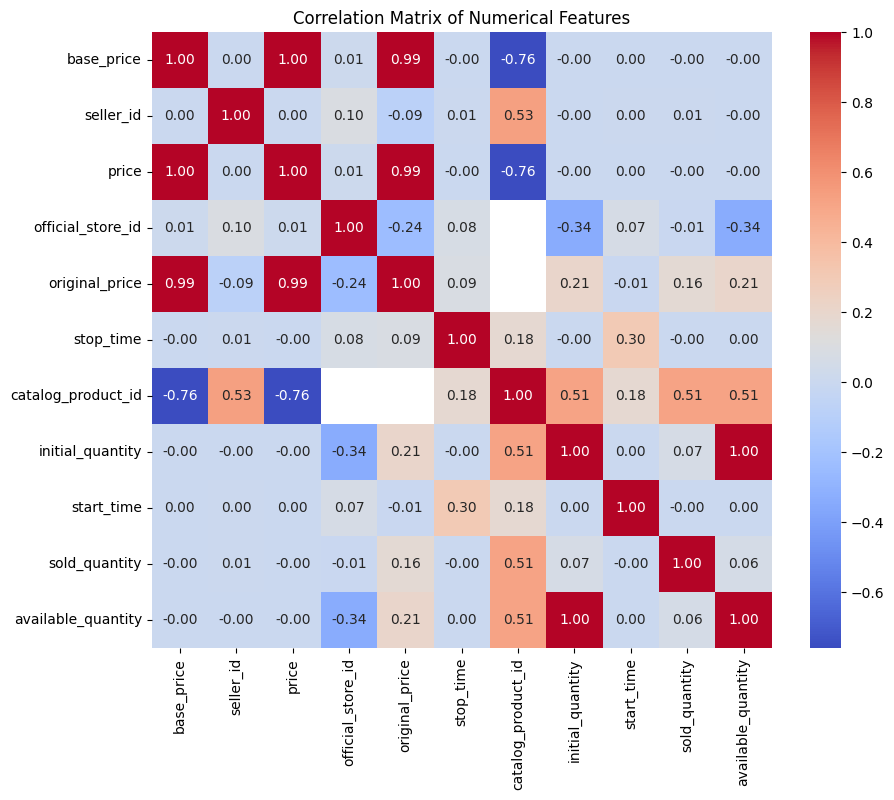

In [32]:
# Compute correlation matrix for numerical features
corr_matrix = X_train_df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Observations:**
- ***Linear correlation:***
    - best_price/price/original_price
    - initial_quantity/available_quantity
- ***Positive correlation:***
    1. catalog_product_id/seller_id
    1. catalog_product_id/initial_quantity/sold_quantity/available_quantity
    1. start_time/stop_time
    1. original_price/initial_quantity/available_quantity/sold_quantity
    1. start_time/catalog_product_id
- ***Negative correlation:***
    1. catalog_product_id/price/base_price
    1. official_store_id/initial_quantity/available_quantity
    1. official_store_id/original_price

**Insights:**
- High correlation between different price & quantity variables is expectable.
- Both `catalog_product_id` & `official_store_id` have a strong negative correlation with price & quantity variables. However, these features had a lot of null values, then they won't be useful for inference.



## 1.2 Target variable

In [307]:
# Target variable distribution
y_train_df.describe()

count     90000
unique        2
top         new
freq      48352
dtype: object

In [308]:
X_train_df['condition'].describe()

count     90000
unique        2
top         new
freq      48352
Name: condition, dtype: object

In [309]:
detected = False
for i, row in enumerate(X_train_df['condition']):
    if row == y_train_df.iloc[i]:
        pass
    else:
        print(f"Mismatch at index {i}:", row)
        detected = True
if not detected:
    print("No mismatches detected between 'condition' and target variable.")

No mismatches detected between 'condition' and target variable.


In [310]:
X_test_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

As we verified, the column `condition` is effectively the target value. We will remove it from dataset.

Actually, it should've been removed by the `new_or_used.py` script, but it seems that feature was forgotten for the test split.

The `build_dataset()` function should be fixed to delete it previously.

In [378]:
# Remove 'condition' column as it is the target variable
del X_train_df['condition']

In [379]:
X_train_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

# 2. Feature Engineering

## Removing empty values

In [380]:
empty_columns = ['differential_pricing', 'subtitle', 'listing_source', 'coverage_areas','international_delivery_mode']
X_train_df[empty_columns].describe()

,differential_pricing,subtitle,listing_source,coverage_areas,international_delivery_mode
count,0,0,90000,90000,90000
unique,0,0,1,1,1
top,NaN,NaN,,[],none
freq,NaN,NaN,90000,90000,90000


In [381]:
# Remove empty columns
X_train_df.drop(columns=empty_columns, inplace=True)
y_train_df.drop(columns=empty_columns, inplace=True)

## Missing Values handling
- Nulls: `parent_item_id`, `warranty`
- empty list ('[]'): `sub_status`, `tags`

### Nulls
We have previously detected missing values for `parent_item_id` and `warranty`, but these features won't be taken in consideration, so handling missing values is no needed by now.

### Empty lists
Some features has '[]' values

In [382]:
# Convert the column to string type to ensure consistency
X_train_df['sub_status'] = X_train_df['sub_status'].astype(str)
X_train_df['sub_status'] = X_train_df['sub_status'].replace('[]', np.nan)

In [383]:
X_train_df['sub_status'].unique()

array([nan, "['suspended']", "['expired']", "['deleted']"], dtype=object)

In [384]:
# Remove items where 'sub_status' contains any data (not active items)
original = len(X_train_df)
mask = X_train_df['sub_status'].isna()
X_train_df = X_train_df[mask]
y_train_df = y_train_df[mask]
cleaned = len(X_train_df)
print(f"Removed {original - cleaned} items ({cleaned/original-1:.2%}) with 'sub_status' data.")

Removed 891 items (-0.99%) with 'sub_status' data.


In [385]:
# Double check if values were removed correctly
X_train_df['sub_status'].unique()

array([nan], dtype=object)

In [386]:
# 'sub_status' is no longer needed, so we can drop it
X_train_df.drop(columns=['sub_status'], inplace=True)

## Outliers handling
## ‼️ pending

## Binary Encoding

In [387]:
X_train_df['currency_id'].value_counts()

currency_id
ARS    88605
USD      504
Name: count, dtype: int64

In [388]:
# Create the new boolean feature 'is_USD'
X_train_df['is_USD'] = (X_train_df['currency_id'] == 'USD')

# Store it as numeric (1/0)
X_train_df['is_USD'] = X_train_df['is_USD'].astype('uint8')

In [389]:
X_train_df.drop(columns=['currency_id'], inplace=True)

checkear object -> bool
automatic_relist, is_USD, accepts_mercadopago, automatic_relist, secure_thumbnail
.astype(bool)

In [390]:
X_train_df['is_USD'].value_counts()

is_USD
0    88605
1      504
Name: count, dtype: int64

In [391]:
# Convert booleans into integers
for col in ['accepts_mercadopago', 'automatic_relist']:
    X_train_df[col] = X_train_df[col].astype('uint8')

## One-hot encoding
**(Categorical features)**

In [392]:
X_train_df['listing_type_id'].value_counts()

listing_type_id
bronze          56182
free            19139
silver           8154
gold_special     2690
gold             2166
gold_premium      765
gold_pro           13
Name: count, dtype: int64

Since these categories (bronze, free, etc.) don't have an inherent ordinal relationship (e.g., 'gold' isn't necessarily "greater" than 'silver' in a numerical sense that a model would understand without context, even if they represent tiers), one-hot encoding is a suitable choice.

In [393]:
X_train_df['buying_mode'].value_counts()

buying_mode
buy_it_now    86439
classified     1979
auction         691
Name: count, dtype: int64

In [394]:
X_train_df['status'].value_counts()

status
active            86116
paused             2992
not_yet_active        1
Name: count, dtype: int64

In [395]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns to encode
categorical_features = ['listing_type_id', 'buying_mode', 'status']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first') # drop='first' for multicollinearity

# Fit and transform the selected categorical columns
encoded_data = encoder.fit_transform(X_train_df[categorical_features])

# Get the feature names for the new columns
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame from the encoded array
ecoded_features = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Concatenate with the original DataFrame (dropping the original categorical columns)
X_train_transformed_df = pd.concat([X_train_df.drop(columns=categorical_features), ecoded_features], axis=1)

In [396]:
X_train_transformed_df.sample(5)  # Display a sample of the transformed training data

,seller_address,warranty,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,price,attributes,tags,parent_item_id,category_id,descriptions,...,start_time,permalink,sold_quantity,available_quantity,is_USD,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_buy_it_now,buying_mode_classified,status_not_yet_active,status_paused
59382,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],170.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5.564568e+09,[{'attribute_combinations': [{'value_id': '919...,MLA,170.0,"[{'value_id': 'female', 'attribute_group_id': ...",[dragged_bids_and_visits],MLA9626731095,MLA60500,[{'id': 'MLA4910374920-904861771'}],...,1.440635e+12,http://articulo.mercadolibre.com.ar/MLA4910374...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
70275,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],3000.0,"{'local_pick_up': False, 'methods': [], 'tags'...",[],3.849629e+09,[],MLA,3000.0,[],[dragged_bids_and_visits],MLA1060546731,MLA4335,[{'id': 'MLA6912518471-915978469'}],...,1.441810e+12,http://articulo.mercadolibre.com.ar/MLA6912518...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
33440,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sí,[],25.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",6.890032e+09,[],MLA,25.0,[],[dragged_bids_and_visits],MLA8466617768,MLA43912,[{'id': 'MLA4211826585-929228352'}],...,1.443132e+12,http://articulo.mercadolibre.com.ar/MLA4211826...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38127,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],120.0,"{'local_pick_up': False, 'methods': [], 'tags'...",[],3.540144e+09,[],MLA,120.0,[],[],None,MLA82437,[{'id': 'MLA2878328871-924789132'}],...,1.442691e+12,http://articulo.mercadolibre.com.ar/MLA2878328...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3903,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],200.0,"{'local_pick_up': False, 'methods': [], 'tags'...","[{'description': 'Transferencia bancaria', 'id...",1.896514e+09,[],MLA,200.0,[],[dragged_bids_and_visits],MLA5846724796,MLA15188,[],...,1.443185e+12,http://articulo.mercadolibre.com.ar/MLA9508625...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Final result

In [397]:
before_len = len(X_train_df.columns)
after_len = len(X_train_transformed_df.columns)
dif_len = after_len - before_len
print("Number of features:")
print(f" - Before transformations: {before_len}")
print(f" - After transformations: {after_len}")
print(f"Increase of {dif_len} features ({(dif_len/before_len):.2%})")

Number of features:
 - Before transformations: 38
 - After transformations: 45
Increase of 7 features (18.42%)


# 3. Feature Selection

In [398]:
# Store all features in a list
features = X_train_transformed_df.columns.tolist()

During missing values analysis it was noticed that these variables were problematic:
`site_id`,`video_id`, `official_store_id`, `original_price`, `catalog_product_id`,`deal_ids`

In [399]:
# As it was stated before, ID variables will be ignored during feature selection.
# Also, time-related and tags variables won't be used.
id_variables = ['id', 'parent_item_id', 'official_store_id', 'category_id', 'site_id', 'video_id', 'catalog_product_id', 'deal_ids', 'seller_id', 'descriptions']
time_variables = ['start_time', 'stop_time', 'date_created', 'last_updated']
tag_variables = ['tags', 'variations', 'shipping', 'attributes', 'non_mercado_pago_payment_methods']
post_related_variables = ['title', 'permalink', 'secure_thumbnail', 'thumbnail', 'pictures'] 

In [400]:
# Remove specific features that are not needed for the analysis
[features.remove(x) for x in (id_variables + time_variables + tag_variables + post_related_variables)]

# Remove other specific features that are not relevant for the analysis
other_features = ['original_price', 'base_price', 'warranty', 'seller_address', 'sold_quantity', 'available_quantity']
[features.remove(x) for x in other_features]

# Show the selected features
print(f"Selected features ({len(features)}):")
str(features)

Selected features (15):


"['price', 'accepts_mercadopago', 'automatic_relist', 'initial_quantity', 'is_USD', 'listing_type_id_free', 'listing_type_id_gold', 'listing_type_id_gold_premium', 'listing_type_id_gold_pro', 'listing_type_id_gold_special', 'listing_type_id_silver', 'buying_mode_buy_it_now', 'buying_mode_classified', 'status_not_yet_active', 'status_paused']"

**Criteria:**
* **Highly correlated features:**
    * **Quantity:** Only `initial_quantity` will be used. The hypothesis is that it could serve to differentiate brand-new items because usually there are more than one available.
    * **Price:** Only `price` will be used.
* **Unrelated features:**
    * Seller address is not relevant for our target.
    * Warranty has a lot of missing values, and there is a lot of diversity of arbitrary values; it's difficult to extract useful information from this feature.
    * Post-related features.

In [401]:
X_train_transformed_df[features].columns

Index(['price', 'accepts_mercadopago', 'automatic_relist', 'initial_quantity',
       'is_USD', 'listing_type_id_free', 'listing_type_id_gold',
       'listing_type_id_gold_premium', 'listing_type_id_gold_pro',
       'listing_type_id_gold_special', 'listing_type_id_silver',
       'buying_mode_buy_it_now', 'buying_mode_classified',
       'status_not_yet_active', 'status_paused'],
      dtype='object')

### Dype Optimization
Every variable will be transformed to its optimal size based on its content, minimizing storage, processing, and training.

In [402]:
X_train_transformed_df[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 89990 entries, 0 to 89095
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         89109 non-null  float64
 1   accepts_mercadopago           89109 non-null  float64
 2   automatic_relist              89109 non-null  float64
 3   initial_quantity              89109 non-null  float64
 4   is_USD                        89109 non-null  float64
 5   listing_type_id_free          89109 non-null  float64
 6   listing_type_id_gold          89109 non-null  float64
 7   listing_type_id_gold_premium  89109 non-null  float64
 8   listing_type_id_gold_pro      89109 non-null  float64
 9   listing_type_id_gold_special  89109 non-null  float64
 10  listing_type_id_silver        89109 non-null  float64
 11  buying_mode_buy_it_now        89109 non-null  float64
 12  buying_mode_classified        89109 non-null  float64
 13  status

In [403]:
df = X_train_transformed_df[features].copy()

# Select only numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns

min_max_values = pd.DataFrame(columns=['Min_Value', 'Max_Value'])

for col in numerical_features:
    min_val = df[col].min()
    max_val = df[col].max()
    min_max_values.loc[col] = [min_val, max_val]

print(min_max_values)

                              Min_Value     Max_Value
price                              0.84  2.222222e+09
accepts_mercadopago                0.00  1.000000e+00
automatic_relist                   0.00  1.000000e+00
initial_quantity                   1.00  9.999000e+03
is_USD                             0.00  1.000000e+00
listing_type_id_free               0.00  1.000000e+00
listing_type_id_gold               0.00  1.000000e+00
listing_type_id_gold_premium       0.00  1.000000e+00
listing_type_id_gold_pro           0.00  1.000000e+00
listing_type_id_gold_special       0.00  1.000000e+00
listing_type_id_silver             0.00  1.000000e+00
buying_mode_buy_it_now             0.00  1.000000e+00
buying_mode_classified             0.00  1.000000e+00
status_not_yet_active              0.00  1.000000e+00
status_paused                      0.00  1.000000e+00


All are unsigned integers:
- For bool-type lower variable will be used (uint8).
- For `initial_quantity` 'int32' will be enough.
- For `price` 'int64' will be needed.

In [ ]:
X_train_transformed_df.isnull().sum()

seller_address              881
warranty                  55100
deal_ids                    881
base_price                  881
shipping                    881
                          ...  
listing_type_id_silver      881
buying_mode_buy_it_now      881
buying_mode_classified      881
status_not_yet_active       881
status_paused               881
Length: 45, dtype: int64

In [406]:
bool_features = features
bool_features.remove('price')
bool_features.remove('initial_quantity')

In [407]:
X_train_transformed_df[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 89990 entries, 0 to 89095
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           89109 non-null  float64
 1   automatic_relist              89109 non-null  float64
 2   is_USD                        89109 non-null  float64
 3   listing_type_id_free          89109 non-null  float64
 4   listing_type_id_gold          89109 non-null  float64
 5   listing_type_id_gold_premium  89109 non-null  float64
 6   listing_type_id_gold_pro      89109 non-null  float64
 7   listing_type_id_gold_special  89109 non-null  float64
 8   listing_type_id_silver        89109 non-null  float64
 9   buying_mode_buy_it_now        89109 non-null  float64
 10  buying_mode_classified        89109 non-null  float64
 11  status_not_yet_active         89109 non-null  float64
 12  status_paused                 89109 non-null  float64
dtypes: flo

In [408]:
optimized_df = X_train_transformed_df[features].copy()

for col in optimized_df.columns:
        optimized_df[col] = pd.to_numeric(optimized_df[col], downcast='integer')

In [409]:
optimized_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89990 entries, 0 to 89095
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           89109 non-null  float64
 1   automatic_relist              89109 non-null  float64
 2   is_USD                        89109 non-null  float64
 3   listing_type_id_free          89109 non-null  float64
 4   listing_type_id_gold          89109 non-null  float64
 5   listing_type_id_gold_premium  89109 non-null  float64
 6   listing_type_id_gold_pro      89109 non-null  float64
 7   listing_type_id_gold_special  89109 non-null  float64
 8   listing_type_id_silver        89109 non-null  float64
 9   buying_mode_buy_it_now        89109 non-null  float64
 10  buying_mode_classified        89109 non-null  float64
 11  status_not_yet_active         89109 non-null  float64
 12  status_paused                 89109 non-null  float64
dtypes: flo

In [410]:
X_train_transformed_df[features].describe()

,accepts_mercadopago,automatic_relist,is_USD,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_buy_it_now,buying_mode_classified,status_not_yet_active,status_paused
count,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000
mean,0.977791,0.047212,0.005656,0.214782,0.024307,0.008585,0.000146,0.030188,0.091506,0.970037,0.022209,0.000011,0.033577
std,0.147363,0.212093,0.074994,0.410673,0.154002,0.092257,0.012078,0.171105,0.288329,0.170487,0.147363,0.003350,0.180138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
---

# 4. Features visualization

### Predictiveness

In [411]:
# Get the numerical columns
numerical_features = X_train_transformed_df[features].select_dtypes(include=['number','bool']).columns.tolist()

print("Numerical features for filtering:")
print(numerical_features)

Numerical features for filtering:
['accepts_mercadopago', 'automatic_relist', 'is_USD', 'listing_type_id_free', 'listing_type_id_gold', 'listing_type_id_gold_premium', 'listing_type_id_gold_pro', 'listing_type_id_gold_special', 'listing_type_id_silver', 'buying_mode_buy_it_now', 'buying_mode_classified', 'status_not_yet_active', 'status_paused']


In [412]:
# Join X_train_transformed_df with y_train_df for correlation analysis
df_corr = X_train_transformed_df.copy()
df_corr['target'] = y_train_df.reset_index(drop=True)

# If 'target' is categorical, encode it for correlation calculation
df_corr['target_encoded'] = (df_corr['target'] == 'new').astype(int)

# Compute correlation with the target
print("CORRELATION")
correlations = df_corr.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)
correlations[1:]  # Exclude the target itself from the results

CORRELATION


listing_type_id_silver          0.168811
listing_type_id_gold_special    0.156955
listing_type_id_gold            0.102546
buying_mode_buy_it_now          0.099804
original_price                  0.078787
                                  ...   
stop_time                      -0.005523
seller_id                      -0.007380
official_store_id              -0.019184
buying_mode_classified         -0.092842
listing_type_id_free           -0.485303
Name: target_encoded, Length: 24, dtype: float64

In [413]:
print("PREDICTIVENESS")
predictiveness = abs(correlations[1:]).sort_values(ascending=False)
predictiveness

PREDICTIVENESS


listing_type_id_free            0.485303
listing_type_id_silver          0.168811
listing_type_id_gold_special    0.156955
listing_type_id_gold            0.102546
buying_mode_buy_it_now          0.099804
                                  ...   
available_quantity              0.001577
accepts_mercadopago             0.001256
listing_type_id_gold_premium    0.001252
start_time                      0.000507
sold_quantity                   0.000484
Name: target_encoded, Length: 24, dtype: float64

In [414]:
print(f"Best predictor for 'new' items is '{predictiveness.idxmax()}', while worst is '{predictiveness.idxmin()}'")

Best predictor for 'new' items is 'listing_type_id_free', while worst is 'sold_quantity'


It's evident that there's a clear correlation between 'free' seller-users (who mostly sell used items) and paying sellers (actual businesses offering new items). Interestingly, the **'gold_premium' tier is not a good predictor.**

In [415]:
df_corr.drop(columns=['target'], inplace=True)  # Ensure 'target_encoded' is not in df_corr before adding it

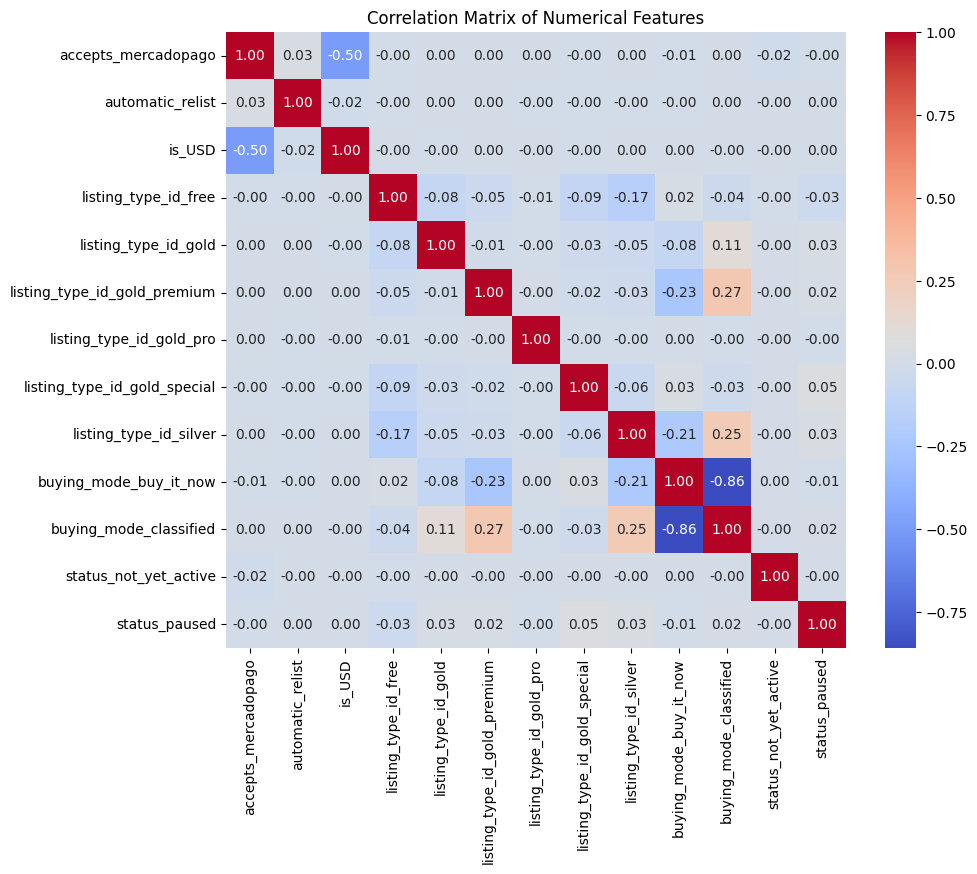

In [416]:
# Compute correlation matrix for numerical features
corr_matrix = df_corr[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [417]:
df_corr[features].isna().sum()

accepts_mercadopago             881
automatic_relist                881
is_USD                          881
listing_type_id_free            881
listing_type_id_gold            881
listing_type_id_gold_premium    881
listing_type_id_gold_pro        881
listing_type_id_gold_special    881
listing_type_id_silver          881
buying_mode_buy_it_now          881
buying_mode_classified          881
status_not_yet_active           881
status_paused                   881
dtype: int64

In [418]:
y_train_df.info()

<class 'pandas.core.series.Series'>
Index: 89109 entries, 0 to 89999
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
89109 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [419]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89109 entries, 0 to 89999
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seller_address                    89109 non-null  object 
 1   warranty                          34890 non-null  object 
 2   deal_ids                          89109 non-null  object 
 3   base_price                        89109 non-null  float64
 4   shipping                          89109 non-null  object 
 5   non_mercado_pago_payment_methods  89109 non-null  object 
 6   seller_id                         89109 non-null  int64  
 7   variations                        89109 non-null  object 
 8   site_id                           89109 non-null  object 
 9   listing_type_id                   89109 non-null  object 
 10  price                             89109 non-null  float64
 11  attributes                        89109 non-null  object 
 12  buying_mo